# Demo: Solving MNIST with a CNN (Convolutional Neural Network)

### MNIST stands for "Modified National Institute of Standards and Technology [Database]". It is a collection of 70,000 pictures of handwritten digits intended for use in image classification and machine learning tests. Each picture is 28x28 in resolution and is greyscale, which makes preprocessing significantly easier and drastically reduces the amount of computation needed to train a model on it. It is a total of 52 MBs in size, making it an extremely lightweight dataset in every way. 

### More information and downloads can be found [here](http://yann.lecun.com/exdb/mnist/). If you want to use MNIST in your own projects, you can also import it from Keras: `from keras.datasets import mnist`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%matplotlib inline

In [2]:
def load_pictures(filepath):
    """
    Reads in a raw binary sequence as a set of 28x28x1 (MNIST) images.
    """
    with open(filepath, "rb") as f:
        return np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
    
def load_labels(filepath):
    """
    Reads in a raw binary sequence as a set of 8 character long (MNIST) labels.
    """
    with open(filepath, "rb") as f:
        return np.frombuffer(f.read(), np.uint8, offset=8)

X_train = load_pictures("data/mnist/X_train")
y_train = load_labels("data/mnist/y_train")
X_test = load_pictures("data/mnist/X_test")
y_test = load_labels("data/mnist/y_test")

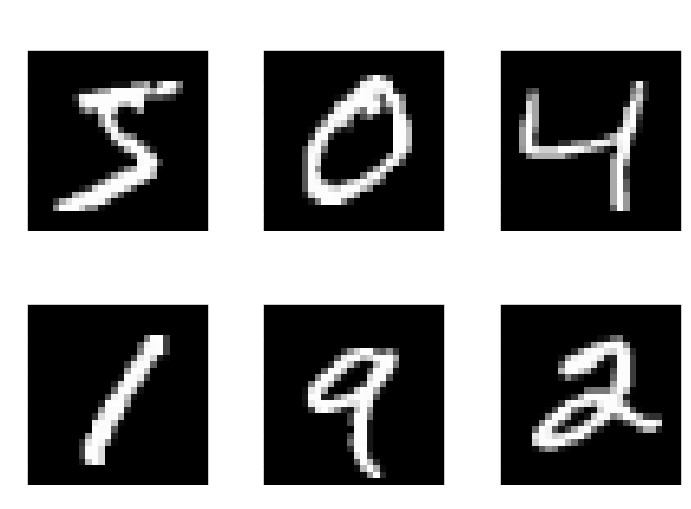

In [63]:
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, 
                         ncols=ncols, 
                         figsize=(4*nrows, 4*ncols))
for i in range(nrows):
    for j in range(ncols):
        index = (i * ncols) + j
        img, label = X_train[index], y_train[index]
        fig.subplots_adjust(hspace=0.4)
        axes[i][j].set_title(label, fontsize=48)
        axes[i][j].imshow(img, cmap="gray");

# CS231n

In [ ]:
def conv(img, filt, padding, stride=2):
    
    
conv()

In [31]:
first = np.array([3, 3, 3])
second = np.array([3, 3, 3])
first * second, first @ second

(array([9, 9, 9]), 27)

### Convolutional functionality implemented with code from these guides by [Ahmed Gad](https://www.kdnuggets.com/2018/04/building-convolutional-neural-network-numpy-scratch.html) and [Alejandro Escontrela](https://towardsdatascience.com/convolutional-neural-networks-from-the-ground-up-c67bb41454e1). 

In [21]:
# Upper half of filter detects horizontal edges,
# lower half of filter detects vertical edges. 
# l1_filter = np.array([[[-1, 0, 1],   
#                        [-1, 0, 1],   
#                        [-1, 0, 1]],
#                       [[ 1, 1, 1],   
#                        [ 0, 0, 0],   
#                        [-1,-1,-1]]]) 

l1_filter = np.zeros((2,3,3))
l1_filter[0, :, :] = np.array([[[-1, 0, 1],   
                                   [-1, 0, 1],   
                                   [-1, 0, 1]]])  
l1_filter[1, :, :] = np.array([[[1,   1,  1],   
                                   [0,   0,  0],   
                                   [-1, -1, -1]]])
     

l1_filter.shape

(2, 3, 3)

In [22]:
def conv(img, filt):  
    assert filt.shape[1] != filt.shape[2], "Error: Filter must be a square matrix."
    assert filt.shape[1 % 2 == 0], "Error: Filter must have an odd size."
    
    n_f, n_c_f, f, _ = filt.shape # filter dimensions
    n_c, in_dim, _ = image.shape # image dimensions
    
    assert n_c == n_c_f, "Dimensions of filter must match dimensions of input image"
    
    out_dim = int((in_dim - f) / s) + 1 # calculate output dimensions

    # An empty feature map to hold the output of convolving the filter(s) with the image.  
    feature_maps = np.zeros((n_f, out_dim, out_dim))
    
    # Convolving the image by the filter(s).  
    for filter_num in range(conv_filter.shape[0]):  
        print("Filter ", filter_num + 1)  
        curr_filter = conv_filter[filter_num, :] # getting a filter from the bank.  
        """  
        Checking if there are mutliple channels for the single filter. 
        If so, then each channel will convolve the image. 
        The result of all convolutions are summed to return a single feature map. 
        """  
        if len(curr_filter.shape) > 2:  
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.  
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.  
                conv_map = conv_map + conv_(img[:, :, ch_num],   
                                  curr_filter[:, :, ch_num])  
        else: # There is just a single channel in the filter.  
            conv_map = conv_(img, curr_filter)  
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
    return feature_maps # Returning all feature maps.

In [23]:
l1_feature_map = conv(img, l1_filter)

AssertionError: Error: Filter must be a square matrix.